In [0]:
import sklearn.datasets as skd
import numpy as np
import pandas as pd

In [0]:
diabetes = skd.load_diabetes
diabetes  = diabetes()

In [0]:
X = diabetes.data
Y = diabetes.target
print(X.shape,Y.shape)

(442, 10) (442,)


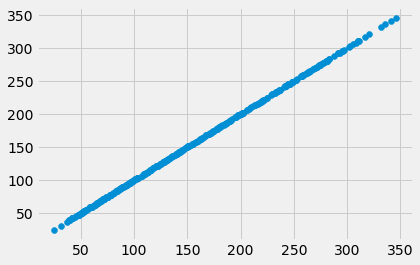

In [0]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.target,diabetes.target) #linear 

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y,test_size = 0.3,random_state=42)

In [0]:
print("X_train" , X_train.shape , ",",
 "Y_train" , Y_train.shape,"," "\n",
 "X_test" , X_test.shape,",", 
 "Y_test" ,Y_test.shape)

X_train (309, 10) , Y_train (309,) ,
 X_test (133, 10) , Y_test (133,)




# > **Regression**

In [0]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [0]:
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print(" intercept = ", reg.intercept_ ,"\n",
     " coefficient = " ,reg.coef_ )

 intercept =  151.00818273080338 
  coefficient =  [  29.25034582 -261.70768053  546.29737263  388.40077257 -901.95338706
  506.761149    121.14845948  288.02932495  659.27133846   41.37536901]


In [0]:
y_reghat = reg.predict(X_test)

In [0]:
from sklearn import metrics

In [0]:
print("mean_absolute_error = " ,metrics.mean_absolute_error(Y_test,y_reghat),"\n",
      "mean_squared_error = " , metrics.mean_squared_error(Y_test,y_reghat))

mean_absolute_error =  41.9192536055668 
 mean_squared_error =  2821.7385595843784


In [0]:
print('Variance score: {}'.format(reg.score(X_test, Y_test))) 

Variance score: 0.4772920174157329


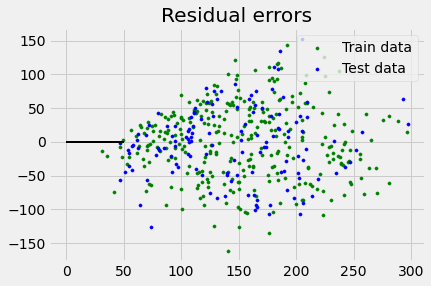

In [0]:
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - Y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - Y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

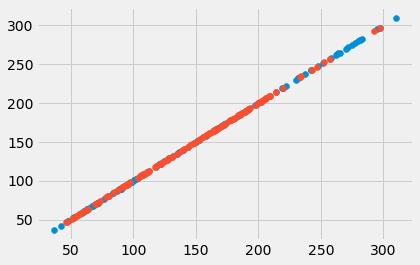

In [0]:
plt.scatter(Y_test,Y_test)
plt.scatter(y_reghat,y_reghat)

#**REGRESSION WITH NORMALIZATION and STANDARDIZATION**

In [0]:
from sklearn import preprocessing 
X_norm = preprocessing.normalize(X)

In [0]:
X_norm_train, X_norm_test, Y_train, Y_test =  train_test_split(X_norm,Y)

In [0]:
reg.fit(X_norm_train,Y_train)
print(" intercept = ", reg.intercept_ ,"\n",
     " coefficient = " ,reg.coef_ )

 intercept =  155.29981255257823 
  coefficient =  [ -1.96728227 -28.08596825  82.78298759  40.58906165 -35.2896293
  -6.47092916 -10.85749642  51.25609819  82.48299818  11.24125462]


In [0]:
y_norm_reghat = reg.predict(X_norm_test)
print("mean_absolute_error = " ,metrics.mean_absolute_error(Y_test,y_norm_reghat),"\n",
      "mean_squared_error = " , metrics.mean_squared_error(Y_test,y_norm_reghat))

mean_absolute_error =  46.27715830415979 
 mean_squared_error =  3417.994878757753


In [0]:
from sklearn import preprocessing 
X_scale = preprocessing.scale(X)

In [0]:
X_scale_train, X_scale_test, Y_train, Y_test =  train_test_split(X_scale,Y)

In [0]:
reg.fit(X_scale_train,Y_train)
print(" intercept = ", reg.intercept_ ,"\n",
     " coefficient = " ,reg.coef_ )

 intercept =  151.77837284425812 
  coefficient =  [  1.97158754 -11.81320387  24.99043662  13.0729452  -15.7020495
   8.75788306  -8.03669869  -2.13516546  28.31570256   4.5782403 ]


In [0]:
y_scale_reghat = reg.predict(X_scale_test)
print("mean_absolute_error = " ,metrics.mean_absolute_error(Y_test,y_scale_reghat),"\n",
      "mean_squared_error = " , metrics.mean_squared_error(Y_test,y_scale_reghat))

mean_absolute_error =  46.591800682882365 
 mean_squared_error =  2927.217885650548


#**LogisticRegression**

In [0]:
breast_cancer = skd.load_breast_cancer()

In [0]:
X = breast_cancer.data
Y = breast_cancer.target

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,stratify = Y)
print("X_train" , X_train.shape , ",",
 "Y_train" , Y_train.shape,"," "\n",
 "X_test" , X_test.shape,",", 
 "Y_test" ,Y_test.shape)

X_train (426, 30) , Y_train (426,) ,
 X_test (143, 30) , Y_test (143,)


In [0]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_lg_hat = logreg.predict(X_test)

In [0]:
def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    

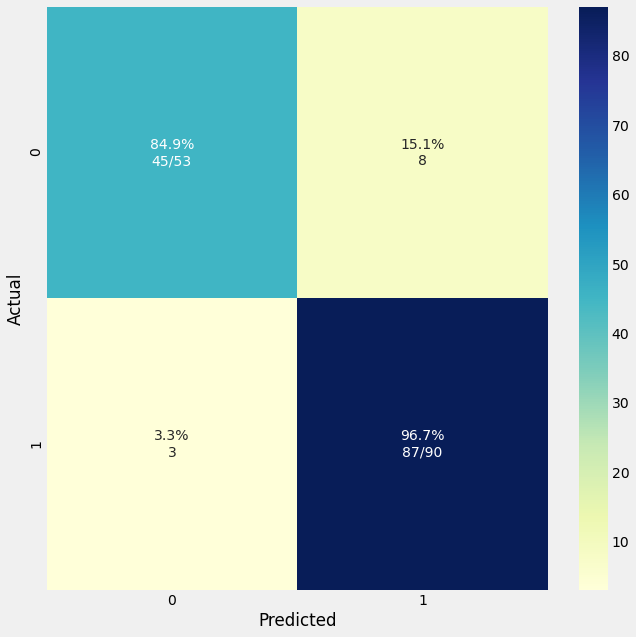

In [0]:
plot_cm(Y_test,y_lg_hat)

In [0]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score


print("\n","1)" ,"balanced accuray =" , balanced_accuracy_score(Y_test,y_lg_hat),"\n",
"2)",classification_report(Y_test,y_lg_hat),"\n",
"3)","jaccard_score = ", jaccard_score(Y_test,y_lg_hat),"\n",
"4)","log_loss =",log_loss(Y_test,y_lg_hat),"\n",
"5)", "ROC = ",roc_auc_score(Y_test,y_lg_hat),"\n")

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(logreg.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(logreg.score(X_test, Y_test)))


 1) balanced accuray = 0.5181341719077568 
 2)               precision    recall  f1-score   support

           0       0.40      0.36      0.38        53
           1       0.64      0.68      0.66        90

    accuracy                           0.56       143
   macro avg       0.52      0.52      0.52       143
weighted avg       0.55      0.56      0.55       143
 
 3) jaccard_score =  0.49193548387096775 
 4) log_loss = 15.216574120223772 
 5) ROC =  0.5181341719077568 

Accuracy of Decision Tree classifier on training set: 0.96
Accuracy of Decision Tree classifier on test set: 0.94


# **Decision Tree**

In [0]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier().fit(X_train,Y_train)

In [0]:
y_dt_hat = DT.predict(X_test)

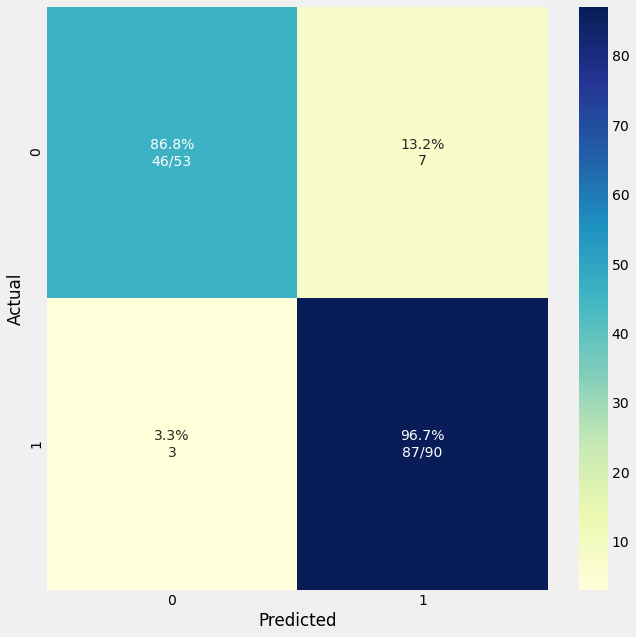

In [0]:
plot_cm(Y_test,y_dt_hat)

In [0]:
print("\n","1)" ,"balanced accuray =" , balanced_accuracy_score(Y_test,y_dt_hat),"\n",
"2)",classification_report(Y_test,y_dt_hat),"\n",
"3)","jaccard_score = ", jaccard_score(Y_test,y_dt_hat),"\n",
"4)","log_loss =",log_loss(Y_test,y_dt_hat),"\n",
"5)", "ROC =",roc_auc_score(Y_test,y_dt_hat),"\n")

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(DT.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(DT.score(X_test, Y_test)))


 1) balanced accuray = 0.9172955974842767 
 2)               precision    recall  f1-score   support

           0       0.94      0.87      0.90        53
           1       0.93      0.97      0.95        90

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143
 
 3) jaccard_score =  0.8969072164948454 
 4) log_loss = 2.4153381897280997 
 5) ROC = 0.9172955974842768 

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.93


# **K-Nearest Neighbors**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
y_k_hat = knn.predict(X_test)

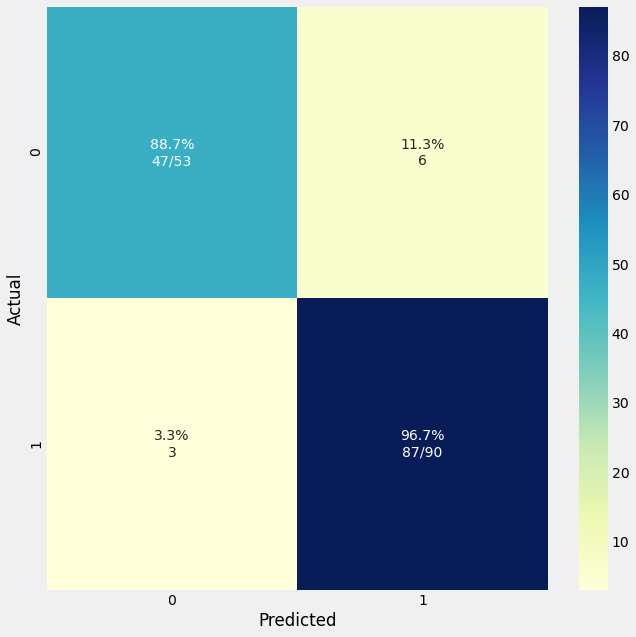

In [0]:
plot_cm(Y_test,y_k_hat)

In [340]:
print("\n","1)" ,"balanced accuray =" , balanced_accuracy_score(Y_test,y_k_hat),"\n",
"2)",classification_report(Y_test,y_k_hat),"\n",
"3)","jaccard_score = ", jaccard_score(Y_test,y_k_hat),"\n",
"4)","log_loss =",log_loss(Y_test,y_k_hat),"\n",
"5)", "ROC =",roc_auc_score(Y_test,y_k_hat),"\n")

print('Accuracy of KNeighborsClassifier on training set: {:.2f}'
     .format(knn.score(X_train, Y_train)))
print('Accuracy of KNeighborsClassifier on test set: {:.2f}'
     .format(knn.score(X_test, Y_test)))


 1) balanced accuray = 0.9267295597484277 
 2)               precision    recall  f1-score   support

           0       0.94      0.89      0.91        53
           1       0.94      0.97      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143
 
 3) jaccard_score =  0.90625 
 4) log_loss = 2.173802693278164 
 5) ROC = 0.9267295597484277 

Accuracy of KNeighborsClassifier on training set: 0.95
Accuracy of KNeighborsClassifier on test set: 0.94


In [0]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

# **Linear Discriminant Analysis**

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
y_lda_hat = lda.predict(X_test)

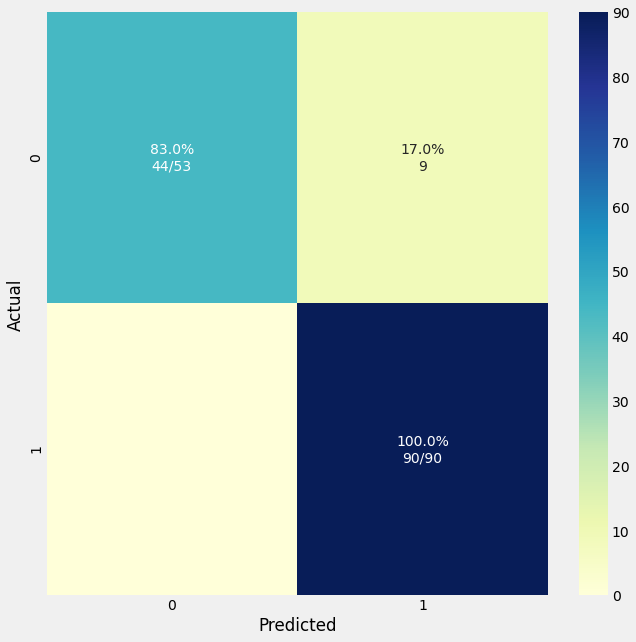

In [0]:
plot_cm(Y_test,y_lda_hat)

In [341]:
print("\n","1)" ,"balanced accuray =" , balanced_accuracy_score(Y_test,y_lda_hat),"\n",
"2)",classification_report(Y_test,y_lda_hat),"\n",
"3)","jaccard_score = ", jaccard_score(Y_test,y_lda_hat),"\n",
"4)","log_loss =",log_loss(Y_test,y_lda_hat),"\n",
"5)", "ROC =",roc_auc_score(Y_test,y_lda_hat),"\n")

print('Accuracy of LinearDiscriminant on training set: {:.2f}'
     .format(lda.score(X_train, Y_train)))
print('Accuracy of LinearDiscriminant on test set: {:.2f}'
     .format(lda.score(X_test, Y_test)))


 1) balanced accuray = 0.9150943396226415 
 2)               precision    recall  f1-score   support

           0       1.00      0.83      0.91        53
           1       0.91      1.00      0.95        90

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143
 
 3) jaccard_score =  0.9090909090909091 
 4) log_loss = 2.1738194680494263 
 5) ROC = 0.9150943396226415 

Accuracy of LinearDiscriminant on training set: 0.97
Accuracy of LinearDiscriminant on test set: 0.94


# **Gaussian Naive Bayes**

In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
y_gnb_hat = gnb.predict(X_test)

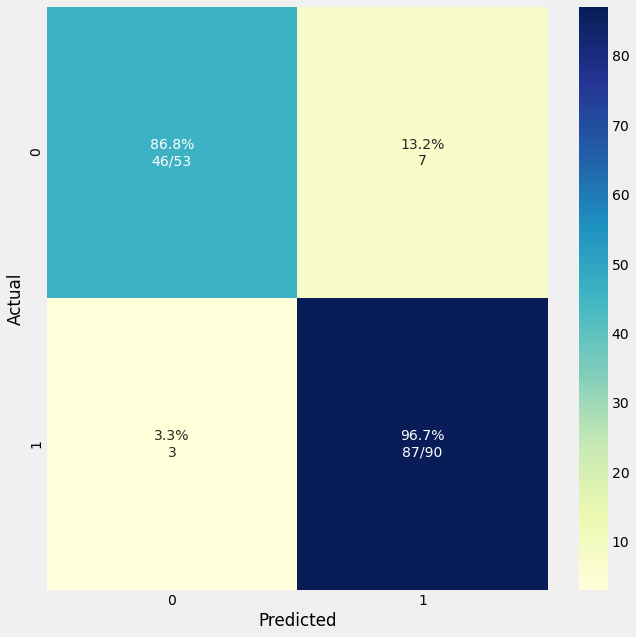

In [344]:
plot_cm(Y_test,y_gnb_hat)

In [345]:
print("\n","1)" ,"balanced accuray =" , balanced_accuracy_score(Y_test,y_gnb_hat),"\n",
"2)",classification_report(Y_test,y_gnb_hat),"\n",
"3)","jaccard_score = ", jaccard_score(Y_test,y_gnb_hat),"\n",
"4)","log_loss =",log_loss(Y_test,y_gnb_hat),"\n",
"5)", "ROC =",roc_auc_score(Y_test,y_gnb_hat),"\n")

print('Accuracy of Gaussian Naive Bayes on training set: {:.2f}'
     .format(gnb.score(X_train, Y_train)))
print('Accuracy of Gaussian Naive Bayes on test set: {:.2f}'
     .format(gnb.score(X_test, Y_test)))


 1) balanced accuray = 0.9172955974842767 
 2)               precision    recall  f1-score   support

           0       0.94      0.87      0.90        53
           1       0.93      0.97      0.95        90

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143
 
 3) jaccard_score =  0.8969072164948454 
 4) log_loss = 2.4153381897281 
 5) ROC = 0.9172955974842768 

Accuracy of Gaussian Naive Bayes on training set: 0.94
Accuracy of Gaussian Naive Bayes on test set: 0.93


# **Support Vector Machine**

In [0]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, Y_train)
y_svm_hat = svm.predict(X_test)

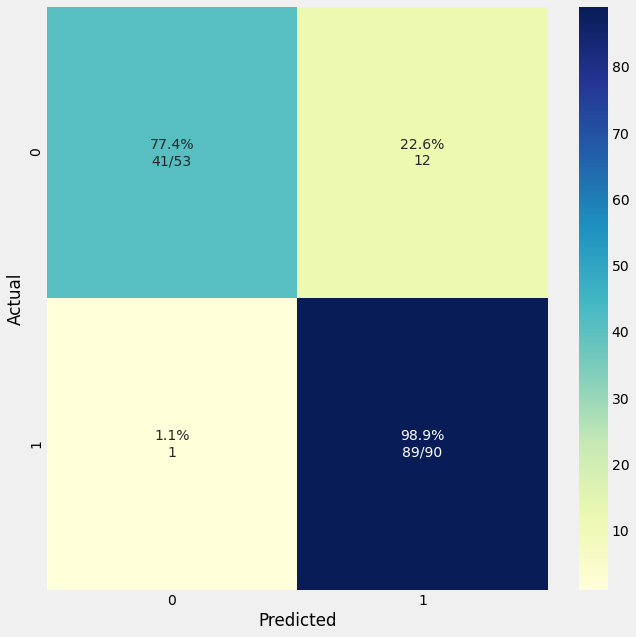

In [347]:
plot_cm(Y_test,y_svm_hat)

In [348]:
print("\n","1)" ,"balanced accuray =" , balanced_accuracy_score(Y_test,y_svm_hat),"\n",
"2)",classification_report(Y_test,y_svm_hat),"\n",
"3)","jaccard_score = ", jaccard_score(Y_test,y_svm_hat),"\n",
"4)","log_loss =",log_loss(Y_test,y_svm_hat),"\n",
"5)", "ROC =",roc_auc_score(Y_test,y_svm_hat),"\n")

print('Accuracy of Support Vector Machine on training set: {:.2f}'
     .format(svm.score(X_train, Y_train)))
print('Accuracy of Support Vector Machine on test set: {:.2f}'
     .format(svm.score(X_test, Y_test)))


 1) balanced accuray = 0.8812368972746332 
 2)               precision    recall  f1-score   support

           0       0.98      0.77      0.86        53
           1       0.88      0.99      0.93        90

    accuracy                           0.91       143
   macro avg       0.93      0.88      0.90       143
weighted avg       0.92      0.91      0.91       143
 
 3) jaccard_score =  0.8725490196078431 
 4) log_loss = 3.1399558622587502 
 5) ROC = 0.8812368972746332 

Accuracy of Support Vector Machine on training set: 0.92
Accuracy of Support Vector Machine on test set: 0.91


#**xgboost**

In [0]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train,Y_train)
y_xg_hat=xg.predict(X_test)

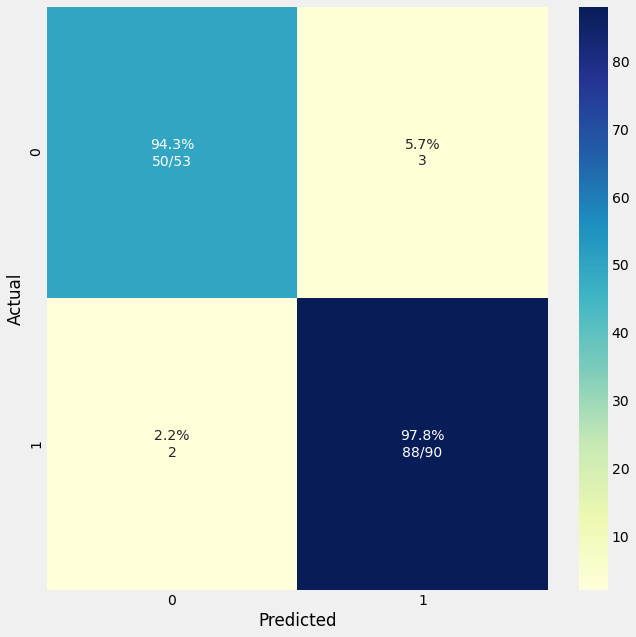

In [353]:
plot_cm(Y_test,y_xg_hat)

In [355]:
print("\n","1)" ,"balanced accuray =" , balanced_accuracy_score(Y_test,y_xg_hat),"\n",
"2)",classification_report(Y_test,y_xg_hat),"\n",
"3)","jaccard_score = ", jaccard_score(Y_test,y_xg_hat),"\n",
"4)","log_loss =",log_loss(Y_test,y_xg_hat),"\n",
"5)", "ROC =",roc_auc_score(Y_test,y_xg_hat),"\n")

print('Accuracy of XGBoost on training set: {:.2f}'
     .format(xg.score(X_train, Y_train)))
print('Accuracy of XGBoost on test set: {:.2f}'
     .format(xg.score(X_test, Y_test)))


 1) balanced accuray = 0.960587002096436 
 2)               precision    recall  f1-score   support

           0       0.96      0.94      0.95        53
           1       0.97      0.98      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143
 
 3) jaccard_score =  0.946236559139785 
 4) log_loss = 1.2076662990688398 
 5) ROC = 0.9605870020964361 

Accuracy of XGBoost on training set: 1.00
Accuracy of XGBoost on test set: 0.97


# **Random Forest Classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train,Y_train)
y_rf_hat=xg.predict(X_test)

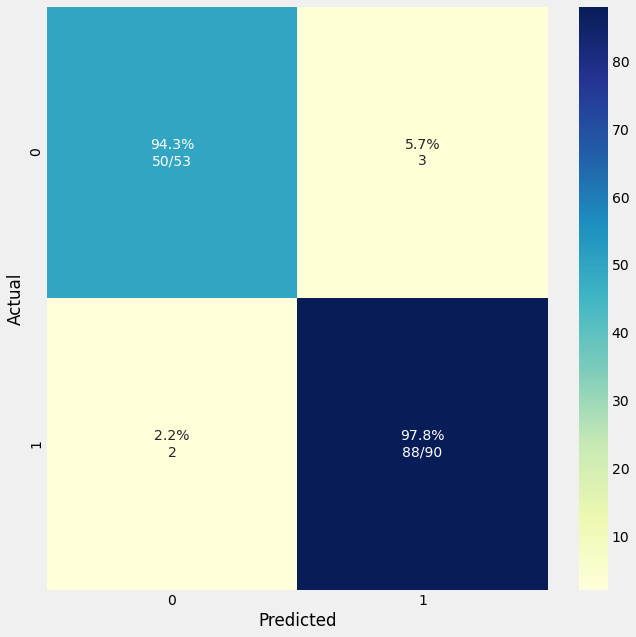

In [360]:
plot_cm(Y_test,y_rf_hat)

In [361]:
print("\n","1)" ,"balanced accuray =" , balanced_accuracy_score(Y_test,y_rf_hat),"\n",
"2)",classification_report(Y_test,y_rf_hat),"\n",
"3)","jaccard_score = ", jaccard_score(Y_test,y_rf_hat),"\n",
"4)","log_loss =",log_loss(Y_test,y_rf_hat),"\n",
"5)", "ROC =",roc_auc_score(Y_test,y_rf_hat),"\n")

print('Accuracy of Random Forest on training set: {:.2f}'
     .format(xg.score(X_train, Y_train)))
print('Accuracy of Random Forest on test set: {:.2f}'
     .format(xg.score(X_test, Y_test)))


 1) balanced accuray = 0.960587002096436 
 2)               precision    recall  f1-score   support

           0       0.96      0.94      0.95        53
           1       0.97      0.98      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143
 
 3) jaccard_score =  0.946236559139785 
 4) log_loss = 1.2076662990688398 
 5) ROC = 0.9605870020964361 

Accuracy of Random Forest on training set: 1.00
Accuracy of Random Forest on test set: 0.97
